## **Problem Statement 01**
### Implement the SIFT algorithm to detect and match key points between two images

In [12]:
pip install opencv-python opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/0d/c6/146487546adc4726f0be591a65b466973feaa58cc3db711087e802e940fb/opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl (46.2 MB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Ayush Dhote\\AppData\\Roaming\\Python\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [2]:
#import the necessary libraries
import cv2
import matplotlib.pyplot as plt

In [62]:
# Read the images
image1 = cv2.imread(r"C:\Users\Ayush Dhote\OneDrive\Pictures\face1.jpg")
image2 = cv2.imread(r"C:\Users\Ayush Dhote\OneDrive\Pictures\face2.jpg")

# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


In [64]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Use FLANN based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors
matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

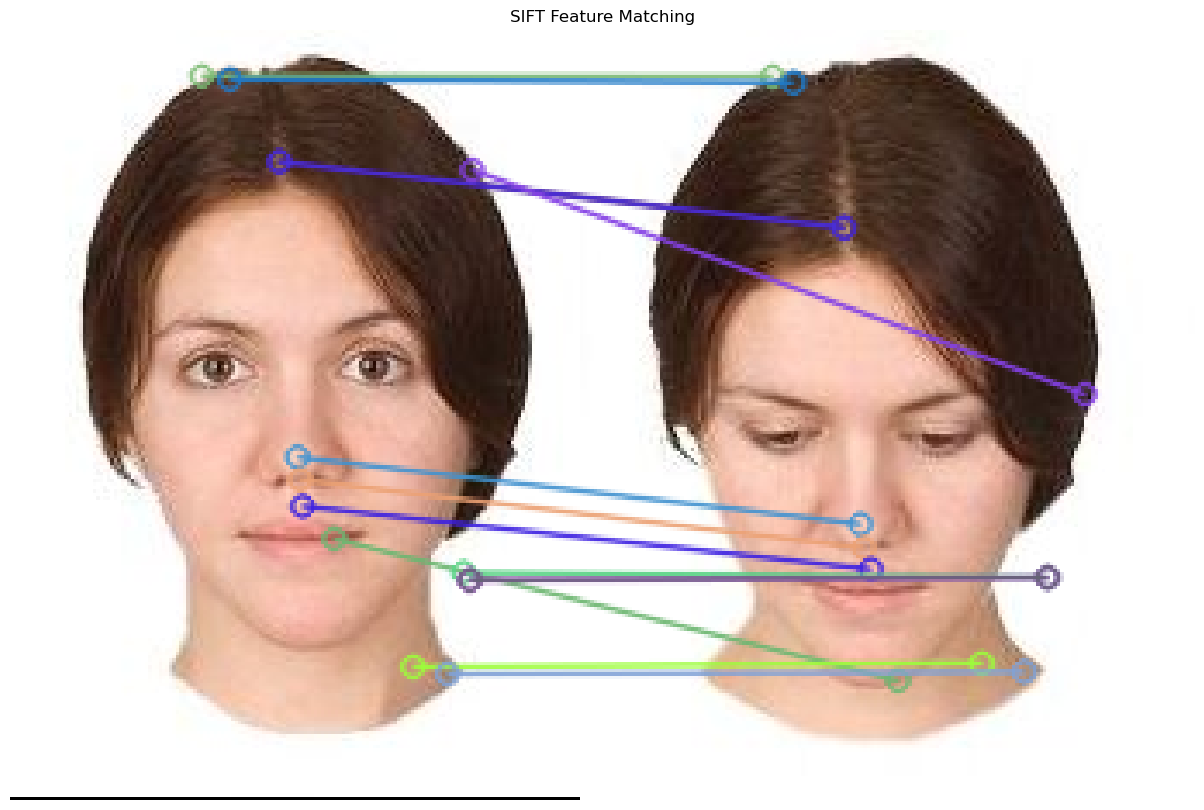

In [66]:
# Draw matches
matched_img = cv2.drawMatches(image1, kp1, image2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the image
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('SIFT Feature Matching')
plt.axis('off')
plt.show()

## **Problem Statement 03**
### Use RANSAC to remove outlier key point matches and fit a transformation model between two images.

In [107]:
!pip install opencv-python 


Defaulting to user installation because normal site-packages is not writeable

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..



  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a4/7d/f1c30a92854540bf789e9cd5dde7ef49bbe63f855b85a2e6b3db8135c591/opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


Total matches: 12
Inliers after RANSAC: 5


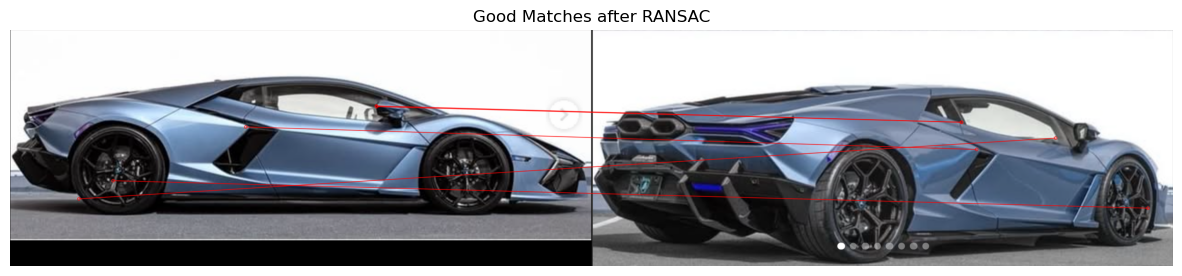

In [138]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the images
img1 = cv2.imread(r"C:\Users\Ayush Dhote\OneDrive\Pictures\lambo1.png" )
img2 = cv2.imread(r"C:\Users\Ayush Dhote\OneDrive\Pictures\lambo2.png")

# Initialize ORB detector
orb = cv2.ORB_create(nfeatures=2000)

# Find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Match descriptors using BFMatcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test to filter good matches (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# If enough matches are found, apply RANSAC
if len(good_matches) > 10:
    # Extract location of good matches
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Compute Homography using RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Select inlier points only
    matchesMask = mask.ravel().tolist()

    print(f"Total matches: {len(good_matches)}")
    print(f"Inliers after RANSAC: {np.sum(mask)}")

    # Draw matches
    draw_params = dict(matchColor=(255, 0, 0),  # Green for inliers
                       singlePointColor=None,
                       matchesMask=matchesMask,  # Draw only inliers
                       flags=2)

    result_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, **draw_params)

    # Show the image
    plt.figure(figsize=(15, 10))
    plt.imshow(result_img)
    plt.title("Good Matches after RANSAC")
    plt.axis('off')
    plt.show()

else:
    print("Not enough good matches are found.")



## **Problem Statement 04**
### Implement the Harris corner detector to find and visualize corners in a grayscale image.

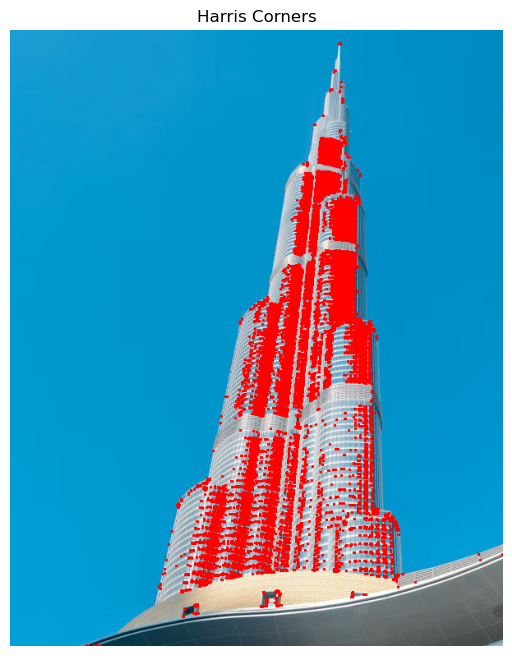

In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread(r"C:\Users\Ayush Dhote\OneDrive\Pictures\burj_khalifa.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float32
gray = np.float32(gray)

# Apply Harris Corner Detector
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value: mark the corners in red
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Show the image
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners")
plt.axis('off')
plt.show()
